<a href="https://colab.research.google.com/github/AhmedElawady74/3_project_for_ML/blob/main/3_project_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## На синтетических данных

In [ ]:
# Importing necessary libraries
# NumPy is used for numerical operations and array manipulations.
import numpy as np

# LogisticRegression from scikit-learn is used to create and train a logistic regression model.
from sklearn.linear_model import LogisticRegression

# PolynomialFeatures is used to generate polynomial features for the input data.
# make_pipeline is used to create a pipeline for applying PolynomialFeatures and LogisticRegression sequentially.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# make_classification from scikit-learn.datasets is used to generate a synthetic classification dataset.
from sklearn.datasets import make_classification

# The code uses Matplotlib for data visualization, including creating scatter plots.
# The generated synthetic dataset is visualized to understand its distribution.
import matplotlib.pyplot as plt

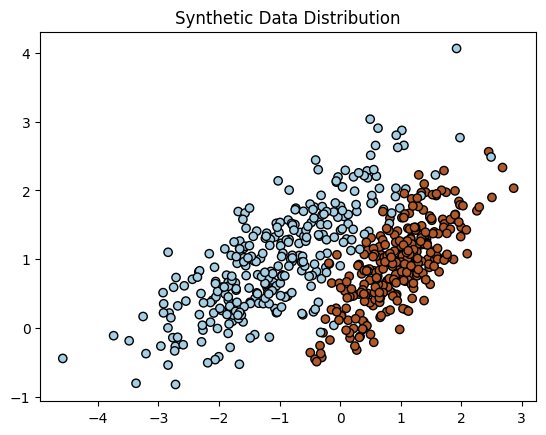

In [ ]:
# Generating synthetic data with a different distribution
X, y = make_classification(n_samples=600, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Displaying the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Synthetic Data Distribution")
plt.show()

Наблюдения:

> Код генерирует синтетические данные, используя функцию make_classification из scikit-learn.

> Сгенерированные данные содержат 600 образцов, 2 признака, 2 информативных признака и 1 кластер на класс.

> Затем данные визуализируются с помощью диаграммы рассеяния, где точки, принадлежащие разным классам, различаются по цвету.
Название графика указывает на то, что он отражает распределение синтетических данных.

In [ ]:
print(X.shape)
print(y.shape)

(600, 2)
(600,)


Мы использовали эту команду, чтобы сначала проверить форму x и y, поскольку для выполнения задачи они должны быть равны.

In [ ]:
# Definition and training of a logistic regression model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

Что мы наблюдали:
При запуске этого кода была создана модель логистической регрессии, которая обучалась на синтетических данных, сгенерированных на предыдущем шаге. Эта модель используется для определения границ, разделяющих два класса в двухкомпонентном пространстве.

In [ ]:
# Display the weights (coefficients) and check if there are any "effects"
print("Weights:", model.coef_)
print("Intercept:", model.intercept_)

Weights: [[ 4.27700922 -3.63399642]]
Intercept: [2.77483314]


Этот код печатает веса (коэффициенты) модели логистической регрессии, которые отражают важность каждой функции для прогнозирования целевой переменной. Также отображается перехват, представляющий смещение в модели. Изучение этих значений помогает оценить влияние каждого признака на решение о классификации.

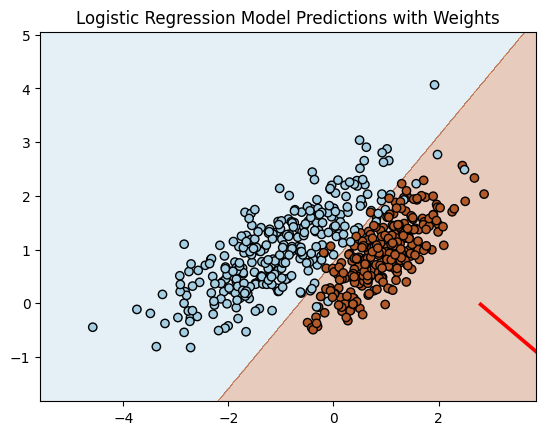

In [ ]:
# Display the data and decision boundaries
# Define the range of values for x and y
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Get the model predictions for each point in the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Plot the weights (coefficients)
plt.quiver(model.intercept_, 0, model.coef_[0][0], model.coef_[0][1], scale=2, color='red')

plt.title("Logistic Regression Model Predictions with Weights")
plt.show()

Мы наблюдали:
Этот код визуализирует границы решения модели логистической регрессии. Заполненный контурный график представляет прогнозы модели в различных областях пространства признаков. На диаграмме рассеяния показаны точки синтетических данных, причем точки окрашены в зависимости от их класса. Красная стрелка указывает направление и величину весов (коэффициентов), что дает представление о влиянии каждого признака на границы принятия решения.

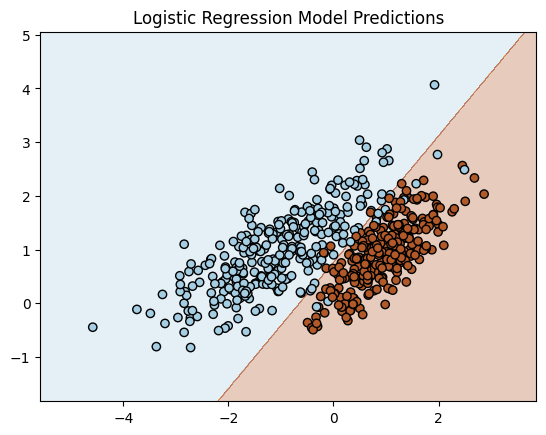

In [ ]:
# Generate new data for prediction
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Model predictions
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Display the data and decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Logistic Regression Model Predictions")
plt.show()

> Что мы наблюдали:

Этот код создает сетку, охватывающую пространство объектов, прогнозирует метки классов с помощью модели логистической регрессии и визуализирует границы решений. Заполненный контурный график представляет прогнозы модели в различных областях пространства признаков, а точечный график показывает синтетические точки данных. Эта визуализация помогает понять, как модель логистической регрессии разделяет разные классы во входном пространстве.

> После запуска окончательного кода:

Мы сгенерировали прогнозы модели для большей области пространства, что позволило нам увидеть границы решений между двумя классами. Заштрихованные регионы с помощью контура выделяют области с разными прогнозами, что облегчает понимание того, как модель принимает решения в разных регионах. Исходные точки данных наносятся на график, чтобы увидеть, как модель их классифицировала. Название «Прогнозы модели логистической регрессии» суммирует основную цель этого дисплея.

## На реальных данных

In [ ]:
# Importing necessary libraries
import seaborn as sns
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np   # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for data visualization
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation metrics

 Выберите набор данных % Первоначальный анализ данных

First few rows of the dataset:
         Make         Model  Year      Style  Distance  Engine_capacity(cm3)  \
0      Toyota         Prius  2011  Hatchback  195000.0                1800.0   
1     Renault  Grand Scenic  2014  Universal  135000.0                1500.0   
2  Volkswagen          Golf  1998  Hatchback       1.0                1400.0   
3     Renault        Laguna  2012  Universal  110000.0                1500.0   
4        Opel         Astra  2006  Universal  200000.0                1600.0   

      Fuel_type Transmission  Price(euro)  
0        Hybrid    Automatic       7750.0  
1        Diesel       Manual       8550.0  
2        Petrol       Manual       2200.0  
3        Diesel       Manual       6550.0  
4  Metan/Propan       Manual       4100.0  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41007 entries, 0 to 41006
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  

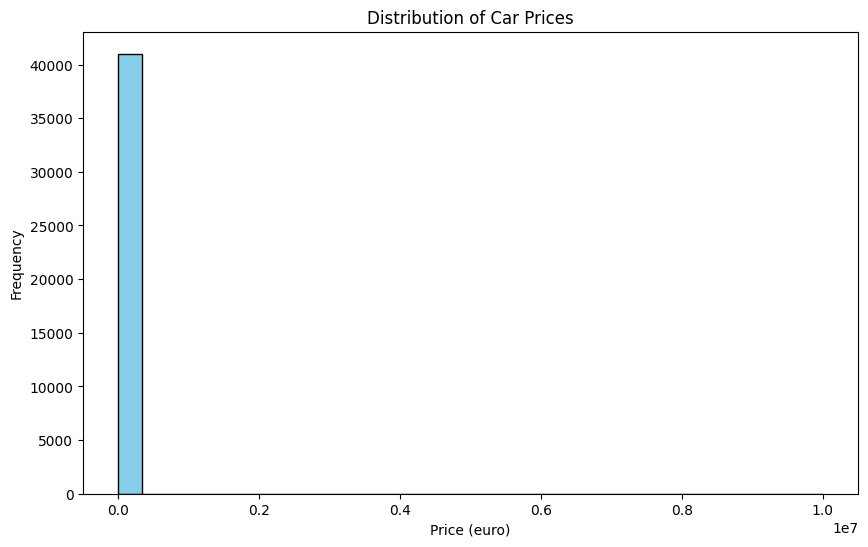

In [ ]:
# Load the dataset
df = pd.read_csv('/content/cars_moldova.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Get information about the dataset
print("\nDataset information:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Visualize the distribution of the target variable 'Price(euro)'
plt.figure(figsize=(10, 6))
plt.hist(df['Price(euro)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (euro)')
plt.ylabel('Frequency')
plt.show()

При запуске кода мы заметили следующие моменты:

> Общая структура данных:
Мы просмотрели первые пять строк данных, чтобы понять, как они организованы и какие столбцы доступны.


> Информация о данных:
Мы получаем обзор типа данных и количества значений в каждом столбце.


> Сводные статистические данные:
Мы использовали сводную статистику, чтобы понять распределение значений в числовых столбцах.


> Проверка пропущенных значений:
Мы гарантировали отсутствие существенных пропущенных значений, которые могли бы существенно повлиять на анализ.


> Плата за распространение целевой группы:
Мы просматривали распределение цен с помощью гистограммы, которая дает нам представление о распределении данных и направляет анализ.

In [ ]:
df.columns
#Имена столбцов

Index(['Make', 'Model', 'Year', 'Style', 'Distance', 'Engine_capacity(cm3)',
       'Fuel_type', 'Transmission', 'Price(euro)'],
      dtype='object')

<ipython-input-27-aa0f332447dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


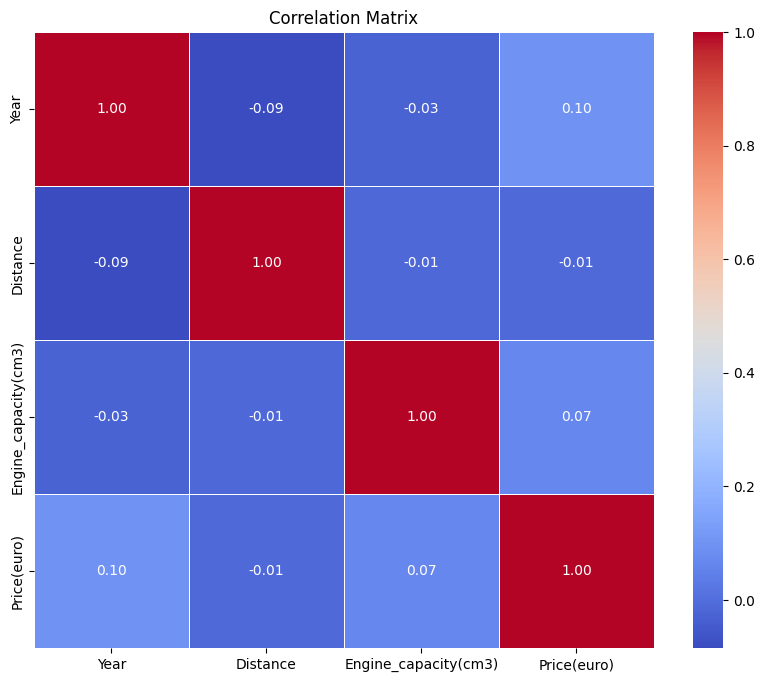

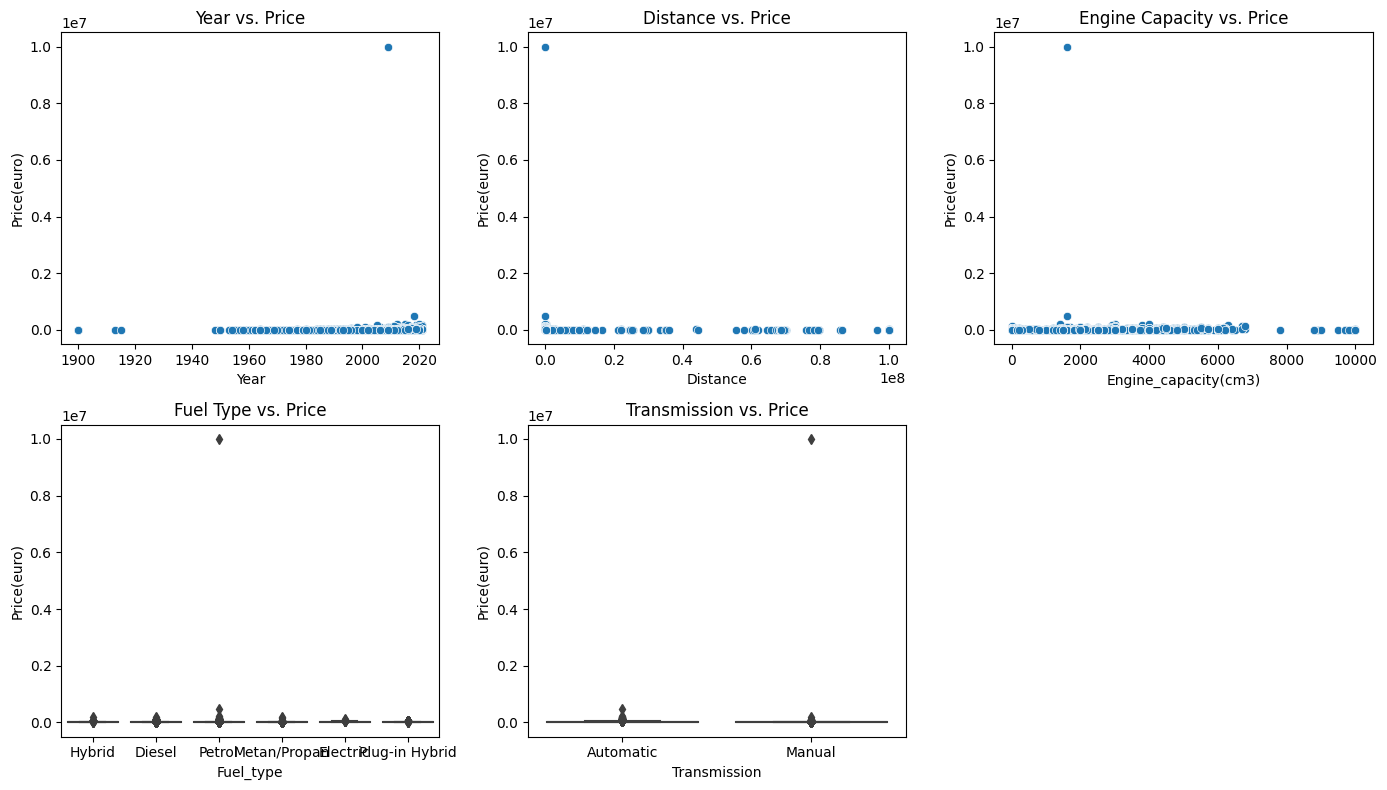

In [ ]:
# Correlation matrix to explore relationships between numerical variables
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot for numerical variables against the target variable
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.scatterplot(x='Year', y='Price(euro)', data=df)
plt.title('Year vs. Price')

plt.subplot(2, 3, 2)
sns.scatterplot(x='Distance', y='Price(euro)', data=df)
plt.title('Distance vs. Price')

plt.subplot(2, 3, 3)
sns.scatterplot(x='Engine_capacity(cm3)', y='Price(euro)', data=df)
plt.title('Engine Capacity vs. Price')

# Categorical variables vs. target variable
plt.subplot(2, 3, 4)
sns.boxplot(x='Fuel_type', y='Price(euro)', data=df)
plt.title('Fuel Type vs. Price')

plt.subplot(2, 3, 5)
sns.boxplot(x='Transmission', y='Price(euro)', data=df)
plt.title('Transmission vs. Price')

plt.tight_layout()
plt.show()

Мы заметили:

> Корреляционная матрица(Correlation Matrix):
На основе корреляционной матрицы мы смогли понять корреляции между числовыми переменными в данных.


> График корреляции(Correlation Plot):
Мы увидели (heatmap) карту, показывающую степень корреляции между различными числовыми переменными, показывающую положительные и отрицательные значения.


> Постройте точки для числовых переменных относительно целевой переменной:
Мы видели графики взаимодействия между некоторыми числовыми переменными (Year، Distance، Engine Capacity) и целевой переменной (Price), что помогает увидеть возможное распределение и взаимосвязь.


> Построение полей для категориальных переменных в зависимости от целевой переменной:
Мы предоставили коробчатые диаграммы, показывающие, как на цену влияют категориальные переменные (тип топлива и вид транспорта), что помогает анализировать различия между категориями целевой переменной.

              Make    Model          Year  Style      Distance  \
count        41007    41007  41007.000000  41007  4.100700e+04   
unique          87      829           NaN     12           NaN   
top     Volkswagen  E Class           NaN  Sedan           NaN   
freq          4304     1382           NaN  12328           NaN   
mean           NaN      NaN   2007.976175    NaN  4.567353e+05   
std            NaN      NaN      8.241487    NaN  4.451897e+06   
min            NaN      NaN   1900.000000    NaN  0.000000e+00   
25%            NaN      NaN   2004.000000    NaN  8.750000e+04   
50%            NaN      NaN   2009.000000    NaN  1.680000e+05   
75%            NaN      NaN   2014.000000    NaN  2.300000e+05   
max            NaN      NaN   2021.000000    NaN  1.000000e+08   

        Engine_capacity(cm3) Fuel_type Transmission   Price(euro)  
count           41007.000000     41007        41007  4.100700e+04  
unique                   NaN         6            2           NaN  
top

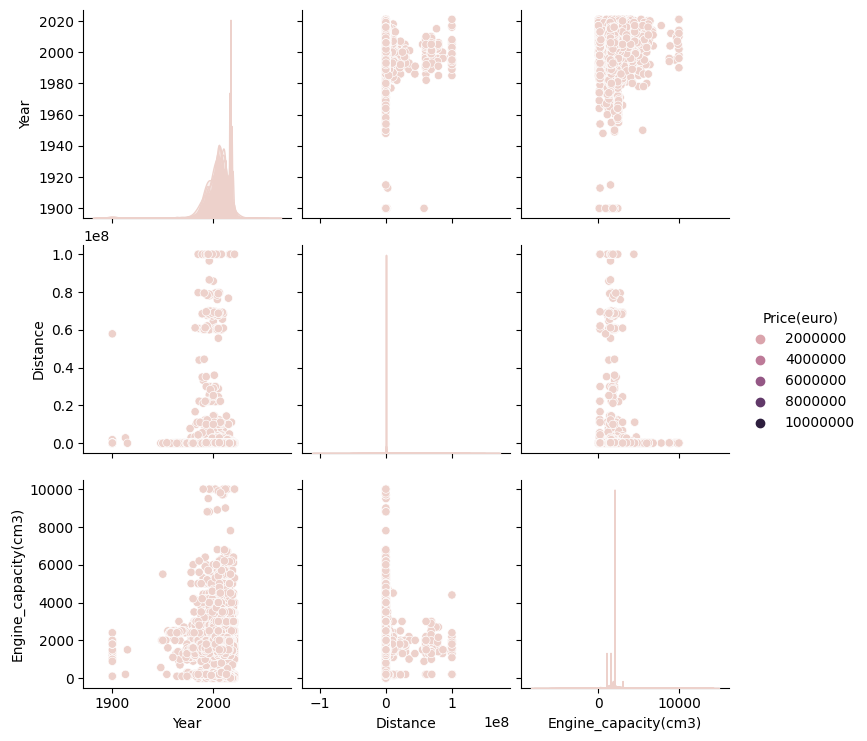

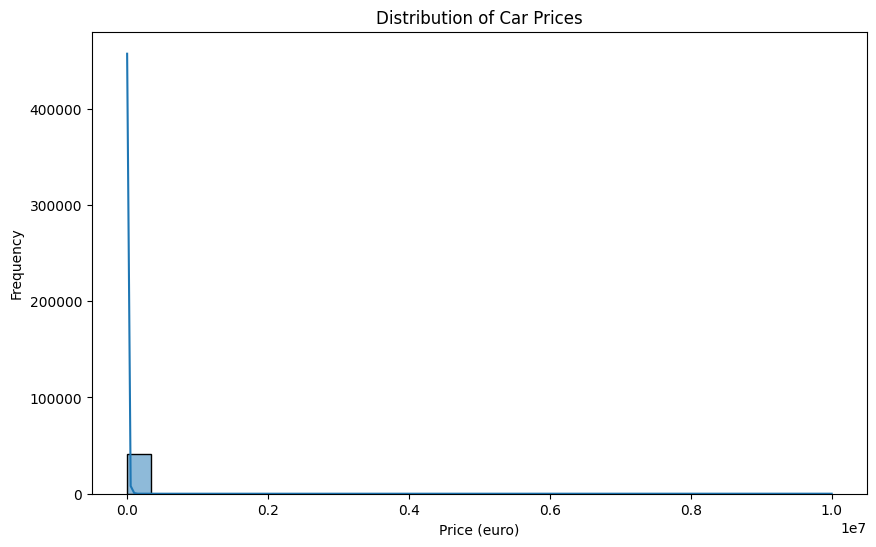

In [ ]:
# Просмотр основных данных
summary = df.describe(include='all')

# Представления о дистрибутивах
sns.pairplot(df, hue='Price(euro)')

# Распределение цен на автомобили
plt.figure(figsize=(10, 6))
sns.histplot(df['Price(euro)'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (euro)')
plt.ylabel('Frequency')

# Показать сводку
print(summary)

# Показать визуализации
plt.show()

При запуске этого кода мы заметили следующие моменты:

> Сводка данных:
describe используется для получения статистической сводки данных, которая включает ключевые статистические данные, такие как среднее значение и стандартное отклонение для каждой переменной.


> Парный сюжет(Pair Plot):
Корреляционная матрица (парный график) была построена для изучения взаимодействия между всеми переменными. На этом графике показаны возможные связи между всеми парами переменных.


> Распределение цен на автомобили:
Распределение цен было построено с помощью histplot, который дает нам представление о том, как цены распределяются в данных.


> Показать статистическую сводку:
print(summary) используется для отображения расширенной статистической сводки, включающей статистику для всех переменных, включая целевую переменную.


> Направление расследования:
Просмотр распределения и сводок данных может помочь выявить закономерности и различия в данных, тем самым помогая делать выводы или проводить дополнительный анализ.




---


---



---

Первоначальная обработка данных

---



In [ ]:
# Splitting the Data
# Separate the features (X) and target variable (y)
X = df.drop('Price(euro)', axis=1)
y = df['Price(euro)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Разделение данных:

- Мы разделяем данные на обучающий и тестовый наборы, и это создает среду для обучения модели на обучающих данных и проверки ее производительности на тестовых данных.

In [ ]:
# Feature Scaling and Handling Missing Values
from sklearn.impute import SimpleImputer

# Choose numerical columns
numerical_columns = X_train.select_dtypes(include=[np.number]).columns

# Separate numerical columns from the dataset
X_train_numeric = X_train[numerical_columns]
X_test_numeric = X_test[numerical_columns]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_train_numeric), columns=numerical_columns)
X_test_numeric_imputed = pd.DataFrame(imputer.transform(X_test_numeric), columns=numerical_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train_numeric_imputed)

# Transform the testing set
X_test_scaled = scaler.transform(X_test_numeric_imputed)

Масштабирование функций и обработка отсутствующих значений:

- StandardScaler использовался для уменьшения разницы в диапазонах числовых данных.
- SimpleImputer использовался для обработки пропущенных значений в числовых данных.

In [ ]:
## Baseline Logistic Regression Model
from sklearn.preprocessing import PolynomialFeatures

# Initialize PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

# Fit and transform the training set
X_train_poly = poly_features.fit_transform(X_train_scaled)

# Transform the testing set
X_test_poly = poly_features.transform(X_test_scaled)

Базовая модель логистической регрессии:

- Базовая логистическая модель была обучена с использованием обучающих данных, а ее производительность оценивалась на тестовых данных.
- Полиномиальные функции были добавлены для улучшения выражения нелинейных отношений.

In [ ]:
# Improving the Model
# Initialize the logistic regression model
improved_model = LogisticRegression()

# Fit the model on the polynomial features of the training data
improved_model.fit(X_train_poly, y_train)

# Predictions on the polynomial features of the testing set
y_pred_improved = improved_model.predict(X_test_poly)

# Evaluate the improved model
accuracy_improved = accuracy_score(y_test, y_pred_improved)
classification_report_improved = classification_report(y_test, y_pred_improved)

# Display the evaluation metrics
print(f'Accuracy (Improved Model): {accuracy_improved}')
print('Classification Report (Improved Model):')
print(classification_report_improved)
# اعدل الكود ده باني اعمل الكود دا بس علي ال4 اللي فوقه ومش يجمعهم سوا

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy (Improved Model): 0.019263594245306024
Classification Report (Improved Model):
              precision    recall  f1-score   support

         5.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         1
       200.0       0.00      0.00      0.00         2
       250.0       0.00      0.00      0.00         2
       300.0       0.00      0.00      0.00         4
       333.0       0.00      0.00      0.00         1
       350.0       0.00      0.00      0.00         3
       400.0       0.00      0.00      0.00         7
       450.0       0.00      0.00      0.00         9
       499.0       0.00      0.00      0.00         1
       500.0       0.04      0.04      0.04        28
       501.0       0.00      0.00      0.00         1
       550.0       0.00      0.00      0.00        16
       555.0       0.00      0.00      0.00         1
       559.0       0.00      0.00      0.00         1
       570.0       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Улучшение модели:

- Модель была улучшена с использованием скалярных функций и обученной на них логистической модели.
- Была оценена производительность улучшенной модели и представлен отчет.


> В общем, мы сегментировали данные, очистили их и подготовили к обучению, обучили базовую логистическую модель, а затем улучшили модель, используя скалярные признаки. Мы также отмечаем, что эти шаги направлены на улучшение производительности модели на тестовых данных и понимание взаимосвязей между переменными.


---



---

 Базовое обучение логистической модели (Baseline) % Улучшение модели


---



In [ ]:
# Разделить данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Инициализируем и обучаем логистическую модель
baseline_model = LogisticRegression()
baseline_model.fit(X_train_scaled, y_train)

# Прогнозирование с использованием модели на тестовом наборе
y_pred = baseline_model.predict(X_test_scaled)

# Оценка эффективности
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Распечатать результаты оценки
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

Accuracy: 0.0245

Classification Report:
               precision    recall  f1-score   support

         5.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         1
       200.0       0.00      0.00      0.00         2
       250.0       0.00      0.00      0.00         2
       300.0       0.00      0.00      0.00         4
       333.0       0.00      0.00      0.00         1
       350.0       0.00      0.00      0.00         3
       400.0       0.00      0.00      0.00         7
       450.0       0.00      0.00      0.00         9
       499.0       0.00      0.00      0.00         1
       500.0       0.00      0.00      0.00        28
       501.0       0.00      0.00      0.00         1
       550.0       0.00      0.00      0.00        16
       555.0       0.00      0.00      0.00         1
       559.0       0.00      0.00      0.00         1
       570.0       0.00      0.00      0.00         2
       599.0       0.00      0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

При запуске этого кода мы сделали следующее:

1- Разделение данных:

- Данные были разделены на наборы для обучения и тестирования: 80% - для обучения и 20% для тестирования.
- Этот шаг необходим для обучения модели на наборе данных и проверки ее производительности на другом наборе, не используемом при обучении.


2- Подготовка и обучение логистической модели:

- Логистическая модель изначально была инициализирована с использованием секционированных обучающих данных.
- Модель обучается на данных, которые были оптимизированы и сокращены.


3- Прогнозирование и оценка эффективности:

- Модель использовалась для прогнозирования категорий тестов.
- Эффективность модели измерялась с использованием таких показателей, как точность, отчет о классификации и матрица путаницы.
- Результаты оценки распечатываются, чтобы обеспечить быстрый обзор производительности модели.


> В общем, этот код оценивает производительность базовой логистической модели на тестовом наборе, не используемом при обучении, и представляет результаты оценки в текстовой форме, что упрощает понимание производительности модели.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Добавить преобразования степеней
degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LogisticRegression())
poly_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('logisticregression', LogisticRegression())])

При запуске этого кода мы сделали следующее:

1- Преобразование атрибутов в определенные степени:

- PolynomialFeatures использовался для преобразования исходных объектов в определенные оценки, где использовалась оценка 2 (квадраты объектов).
- Это направлено на улучшение базовой логистической модели путем введения нелинейных взаимодействий между атрибутами.


2- Обучение улучшенной модели логистики:

- Создана улучшенная логистическая модель с использованием make_pipeline для упорядочивания преобразований атрибутов и обучения логистической модели.
- Эта модель обучена на предварительно сегментированных данных (X_train_scaled и y_train).


Таким образом, мы улучшаем базовую логистическую модель, добавляя пошаговые преобразования, которые могут улучшить ее способность обрабатывать нелинейные взаимодействия в данных.

In [ ]:
# Прогнозирование с использованием улучшенной модели
y_pred_poly = poly_model.predict(X_test_scaled)

# Оценка производительности улучшенной модели
accuracy_poly = accuracy_score(y_test, y_pred_poly)
classification_rep_poly = classification_report(y_test, y_pred_poly)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)

# Распечатываем результаты оценки улучшенной модели
print(f"Improved Model Accuracy: {accuracy_poly:.4f}")
print("\nClassification Report for Improved Model:\n", classification_rep_poly)
print("\nConfusion Matrix for Improved Model:\n", conf_matrix_poly)

Improved Model Accuracy: 0.0193

Classification Report for Improved Model:
               precision    recall  f1-score   support

         5.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         1
       200.0       0.00      0.00      0.00         2
       250.0       0.00      0.00      0.00         2
       300.0       0.00      0.00      0.00         4
       333.0       0.00      0.00      0.00         1
       350.0       0.00      0.00      0.00         3
       400.0       0.00      0.00      0.00         7
       450.0       0.00      0.00      0.00         9
       499.0       0.00      0.00      0.00         1
       500.0       0.04      0.04      0.04        28
       501.0       0.00      0.00      0.00         1
       550.0       0.00      0.00      0.00        16
       555.0       0.00      0.00      0.00         1
       559.0       0.00      0.00      0.00         1
       570.0       0.00      0.00      0.00         2
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1- Прогноз категории с использованием улучшенной модели:

- Для прогнозирования категорий тестовых данных (X_test_scaled) использовалась улучшенная модель, использующая пошаговые преобразования (poly_model).
- y_pred_poly содержит прогнозы для категорий.


2- Оценка производительности улучшенной модели:

- Точность улучшенной модели рассчитывалась с помощью Precision_score.
- Отчет об оценке производительности был создан с помощью классификатора_report.
- Матрица путаницы была создана с использованием путаницы_matrix.


3- Распечатайте результаты оценки:

- Повышена точность модели, напечатан отчет о классе и матрица путаницы.



Используя этот код, мы оценили производительность улучшенной модели и изучили результаты в текстовой форме, что облегчило понимание того, как модель работает по различным показателям.

In [ ]:
# Разделение проверочных данных на тестовые и проверочные наборы
X_validation, X_test_final, y_validation, y_test_final = train_test_split(X_test_scaled, y_test, test_size=0.5, random_state=42)

# Прогнозирование с использованием модели на основе данных проверки
y_pred_validation = baseline_model.predict(X_validation)

# Оценка производительности данных проверки
accuracy_validation = accuracy_score(y_validation, y_pred_validation)
classification_rep_validation = classification_report(y_validation, y_pred_validation)
conf_matrix_validation = confusion_matrix(y_validation, y_pred_validation)

# Распечатать результаты оценки для проверки данных
print("Validation Data Accuracy:", accuracy_validation)
print("\nClassification Report for Validation Data:\n", classification_rep_validation)
print("\nConfusion Matrix for Validation Data:\n", conf_matrix_validation)

Validation Data Accuracy: 0.01999512314069739

Classification Report for Validation Data:
               precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         1
       200.0       0.00      0.00      0.00         1
       250.0       0.00      0.00      0.00         1
       300.0       0.00      0.00      0.00         1
       333.0       0.00      0.00      0.00         1
       350.0       0.00      0.00      0.00         2
       400.0       0.00      0.00      0.00         4
       450.0       0.00      0.00      0.00         5
       499.0       0.00      0.00      0.00         1
       500.0       0.00      0.00      0.00        16
       550.0       0.00      0.00      0.00        10
       555.0       0.00      0.00      0.00         1
       559.0       0.00      0.00      0.00         1
       570.0       0.00      0.00      0.00         1
       600.0       0.00      0.00      0.00         8
       650.0       0.00      0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


При использовании этого кода мы сделали следующее:

1- Отдел проверочных данных:

- train_test_split использовался для разделения тестовых данных (X_test_scaled и y_test) на наборы проверки (X_validation и y_validation) и окончательный набор тестов (X_test_final и y_test_final).


2- Прогнозирование категорий с использованием модели:

- Базовая_модель использовалась для прогнозирования категорий данных проверки (X_validation).


3- Оценка производительности модели на основе проверочных данных:

- Точность модели рассчитывалась на основе данных проверки с использованием Precision_score.
- Отчет об оценке производительности был создан с помощью классификатора_report.
- Матрица путаницы была создана с использованием путаницы_matrix.


4- Распечатайте результаты оценки для данных проверки:

- Точность модели отображается в данных проверки, отчете о классе и матрице путаницы.


> Используя этот код, мы оценили производительность модели на проверочном наборе и изучили результаты в текстовой форме, что облегчило понимание того, как модель работает на новых данных, на которых она не обучалась.

In [ ]:
!pip install plotly
!pip install seaborn
# Установите библиотеки, необходимые для следующего кода

Baseline Model Performance:
Accuracy: 0.0200

Classification Report:
               precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         1
       200.0       0.00      0.00      0.00         1
       250.0       0.00      0.00      0.00         1
       300.0       0.00      0.00      0.00         1
       333.0       0.00      0.00      0.00         1
       350.0       0.00      0.00      0.00         2
       400.0       0.00      0.00      0.00         4
       450.0       0.00      0.00      0.00         5
       499.0       0.00      0.00      0.00         1
       500.0       0.00      0.00      0.00        16
       550.0       0.00      0.00      0.00        10
       555.0       0.00      0.00      0.00         1
       559.0       0.00      0.00      0.00         1
       570.0       0.00      0.00      0.00         1
       600.0       0.00      0.00      0.00         8
       650.0       0.00      0.00      0.00         4
       670.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



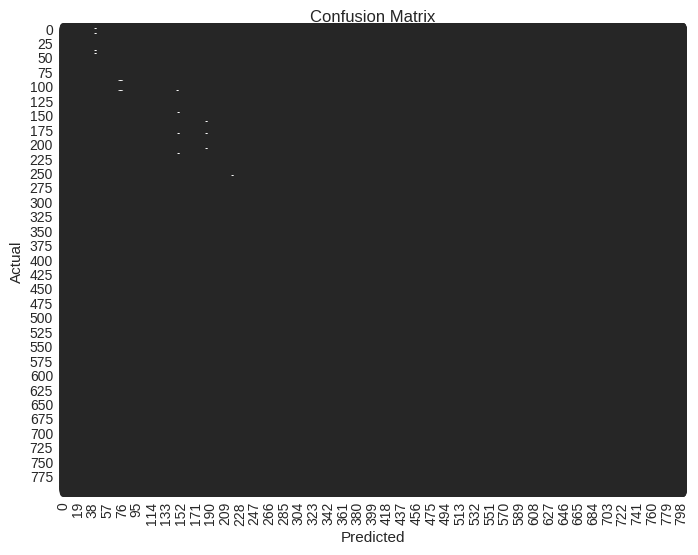


Improved Model Performance:
Accuracy: 0.0171

Classification Report:
               precision    recall  f1-score   support

        10.0       0.00      0.00      0.00         1
       200.0       0.00      0.00      0.00         1
       250.0       0.00      0.00      0.00         1
       300.0       0.00      0.00      0.00         1
       333.0       0.00      0.00      0.00         1
       350.0       0.00      0.00      0.00         2
       400.0       0.00      0.00      0.00         4
       450.0       0.00      0.00      0.00         5
       499.0       0.00      0.00      0.00         1
       500.0       0.07      0.06      0.07        16
       550.0       0.00      0.00      0.00        10
       555.0       0.00      0.00      0.00         1
       559.0       0.00      0.00      0.00         1
       570.0       0.00      0.00      0.00         1
       600.0       0.00      0.00      0.00         8
       650.0       0.00      0.00      0.00         4
       670

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



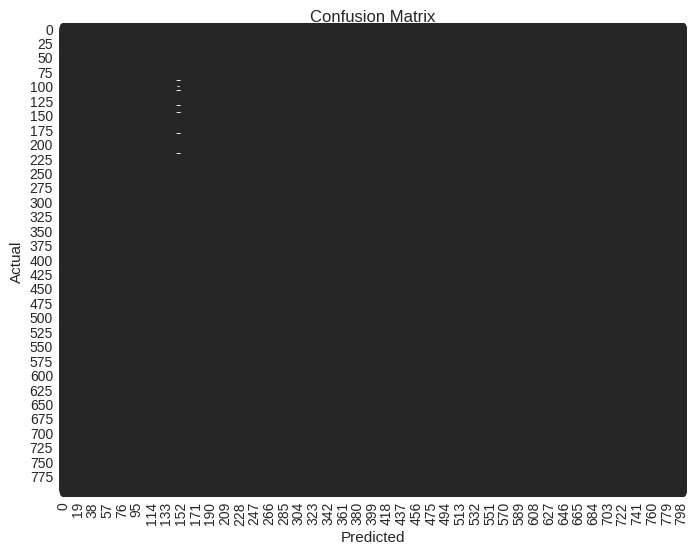

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_and_visualize_performance(model, X, y_true):
    # Predictions
    y_pred = model.predict(X)

    # Evaluate performance
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Display evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_rep)
    print("\nConfusion Matrix:\n", conf_matrix)

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Оцените и постройте график производительности базовой модели
print("Baseline Model Performance:")
evaluate_and_visualize_performance(baseline_model, X_validation, y_validation)

# Оцените и постройте график производительности улучшенной модели
print("\nImproved Model Performance:")
evaluate_and_visualize_performance(poly_model, X_validation, y_validation)

При использовании этого кода мы оценили производительность двух моделей:

1- Базовая_модель (baseline_model):

- Его производительность оценивалась с помощью функции Assessment_and_visualize_ Performance.
- Распечатанная точность модели, отчет об оценках и матрица ошибок.
- Мы построили матрицу путаницы, используя seaborn.heatmap.


2- Улучшенная модель (poly_model):

- Его выступление оценивалось так же и с теми же функциями.
- Распечатана точность улучшенной модели, отчет об оценке улучшенной модели и матрица путаницы улучшенной модели.
-Мы также построили матрицу путаницы для улучшенной модели.



Разница между двумя последними кодами:

- Основное отличие заключается в построении матрицы путаницы. Второй код использует seaborn.heatmap для визуального построения матрицы путаницы, что упрощает ее понимание, а не просто распечатывает значения.
- Была создана функция (evaluate_and_visualize_ Performance) для оценки и построения графиков производительности модели, что облегчает повторное использование и модификацию в будущем.



> Используя этот код, мы сравнили производительность двух моделей и оценили производительность с помощью текстовых отчетов и визуальных матриц путаницы.

In [ ]:
import plotly.express as px

# Выполняем модель и прогноз
y_pred = baseline_model.predict(X_test_scaled)

# Анализ ошибок
error_analysis = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Создайте интерактивный график
fig = px.scatter(error_analysis, x='Actual', y='Predicted', color=y_test, labels={'color': 'Actual'}, title='Error Analysis')
fig.update_layout(xaxis_title='Actual', yaxis_title='Predicted')
fig.show()


При использовании этого кода мы выполнили анализ ошибок в прогнозах с использованием базовой логистической модели. Что мы заметили:

1- Интерактивный график:


- Интерактивный график, созданный с использованием библиотеки Plotly Express.
- Ошибки были проанализированы с помощью диаграммы рассеяния, которая дает нам детальное представление о том, как прогнозирует модель по сравнению с фактическими значениями.
- На диаграмме отображаются фактические значения по горизонтальной оси и прогнозируемые значения по вертикальной оси, а для разделения категорий используется цвет.


2- Анализ ошибок:

- Был создан кадр данных (error_anaанализ), содержащий фактические значения и прогнозы для анализа.
- Этот анализ помогает понять моменты, которые могут противоречить фактическим значениям и прогнозам, и, таким образом, помогает выявить случаи, которые могут потребовать пересмотра или улучшения модели.


3- Преимущество:

- Этот анализ помогает выявить области, в которых модель может работать плохо или где могут потребоваться дальнейшие улучшения.
- На графике представлены визуальные детали, которые облегчают пользователю понимание отклонений между прогнозами и фактическими значениями.